<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Activity Diagrams Part 5</h1><br />
</tr>
</table>
</left>

### What's covered in this demo?

- Adding water stability lines to an Eh-pH diagram with `add_saturation_lines`

### Getting ready

Let's create an Eh-pH diagram representing an aqueous inorganic sulfur system at 250 °C and 2 kb using what we've learned from parts 1-4 of this demo.

In [1]:
from pychnosz import *
_ = thermo("WORM")

reset: thermodynamic system initialized
The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species


In [2]:
basis(["H2O", "H2S", "e-", "H+"])

info_character: found H2O(liq) [water]; also available in gas
info_character: found H2S(aq); also available in gas


H    O    S    Z  ispecies  logact state
H2O  2.0  1.0  0.0  0.0         1     0.0   liq
H2S  2.0  0.0  1.0  0.0        65     0.0    aq
e-   0.0  0.0  0.0 -1.0         3     0.0    aq
H+   1.0  0.0  0.0  1.0         2     0.0    aq

In [3]:
basis("H2S", -5)

H    O    S    Z  ispecies  logact state
H2O  2.0  1.0  0.0  0.0         1     0.0   liq
H2S  2.0  0.0  1.0  0.0        65    -5.0    aq
e-   0.0  0.0  0.0 -1.0         3     0.0    aq
H+   1.0  0.0  0.0  1.0         2     0.0    aq

Retrieving all chemical species that contain sulfur and optionally O and/or H, then assigning them to be our species to plot:

In [4]:
species(retrieve("S", ["O", "H"], state="aq"))

retrieve: updating stoichiometric matrix


H2O  H2S    e-    H+  ispecies  logact state    name
0   0.0  1.0   0.0  -1.0        22    -3.0    aq     HS-
1   3.0  1.0  -6.0  -7.0        23    -3.0    aq   HSO3-
2   4.0  1.0  -8.0 -10.0        24    -3.0    aq   SO4-2
3   4.0  1.0  -8.0  -9.0        25    -3.0    aq   HSO4-
4   3.0  2.0  -8.0 -10.0        26    -3.0    aq  S2O3-2
5   8.0  2.0 -18.0 -20.0        27    -3.0    aq  S2O8-2
6   0.0  2.0  -2.0  -4.0        51    -3.0    aq    S2-2
7   0.0  3.0  -4.0  -6.0        52    -3.0    aq    S3-2
8   0.0  4.0  -6.0  -8.0        53    -3.0    aq    S4-2
9   0.0  5.0  -8.0 -10.0        54    -3.0    aq    S5-2
10  0.0  1.0   0.0   0.0        65    -3.0    aq     H2S
11  2.0  1.0  -6.0  -6.0        73    -3.0    aq     SO2
12  3.0  1.0  -6.0  -8.0       435    -3.0    aq   SO3-2
13  5.0  1.0 -10.0 -11.0       436    -3.0    aq   HSO5-
14  3.0  2.0  -8.0  -8.0       437    -3.0    aq  H2S2O3
15  4.0  2.0 -10.0 -12.0       438    -3.0    aq  S2O4-2
16  4.0  2.0 -10.0 -11.0       439    -3.0    aq  HS2O4-
17  4.0  2.0 -10.0 -10.0       440    -3.0    aq  H2S2O4
18  5.0  2.0 -12.0 -14.0       441    -3.0    aq  S2O5-2
19  6.0  2.0 -14.0 -16.0       442    -3.0    aq  S2O6-2
20  6.0  3.0 -16.0 -18.0       443    -3.0    aq  S3O6-2
21  6.0  4.0 -18.0 -20.0       444    -3.0    aq  S4O6-2
22  6.0  5.0 -20.0 -22.0       445    -3.0    aq  S5O6-2
23  3.0  2.0  -8.0  -9.0      1634    -3.0    aq  HS2O3-

In [5]:
a = affinity(pH=[0, 12], Eh=[-1, 0.5], T=250, P=2000)

affinity: temperature is 250 ºC
affinity: pressure is 2000 bar
affinity: variable 1 is log10(a_H+) at 256 values from 0 to -12
subcrt: 27 species at 250 ºC and 2000.00 bar (wet) [energy units: J]


Make sure `fig_out=True` and that the figure is assigned to a Python variable, e.g., `d`

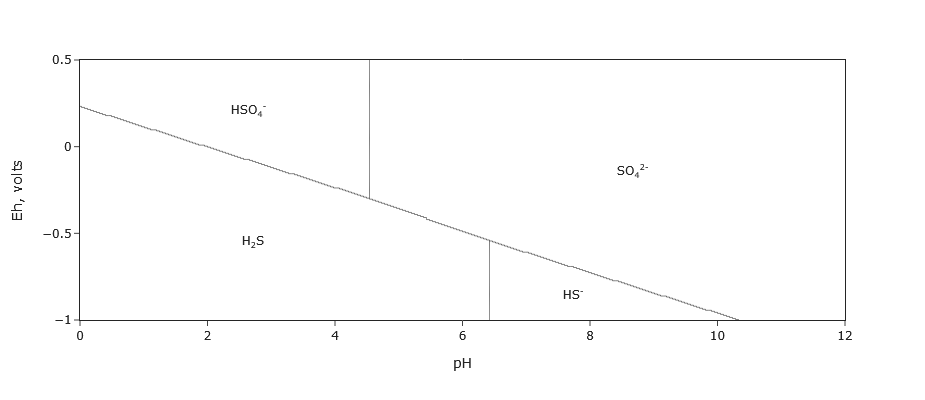

In [6]:
d = diagram(a,
            balance="H2S", # balancing on sulfur in formation reactions
            fill="none", # no fill
            col="black", # black lines
            lwd=0.5, # line thickness
            width=500, height=400, interactive=True)

Interesting! Only sulfide and sulfate are predominant in our Eh-pH diagram despite having so many other competing sulfur species.

### Adding water stability lines

Now that we've created an Eh-pH plot, let's add lines that represent the stability limits of water. One line will represent equilibrium between water and H<sub>2(g)</sub> under reduced conditions, and the other between water and O<sub>2(g)</sub> under oxidized conditions. Beyond these lines, H<sub>2(g)</sub> or O<sub>2(g)</sub> will be more stable than water.

This can be done with the `water_lines` function. The first variable, `d`, stores our previous figure to which the lines will be added. The `lwd` parameter sets line width.

subcrt: 3 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
subcrt: 2 species at 250 ºC and 2000.00 bar [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]


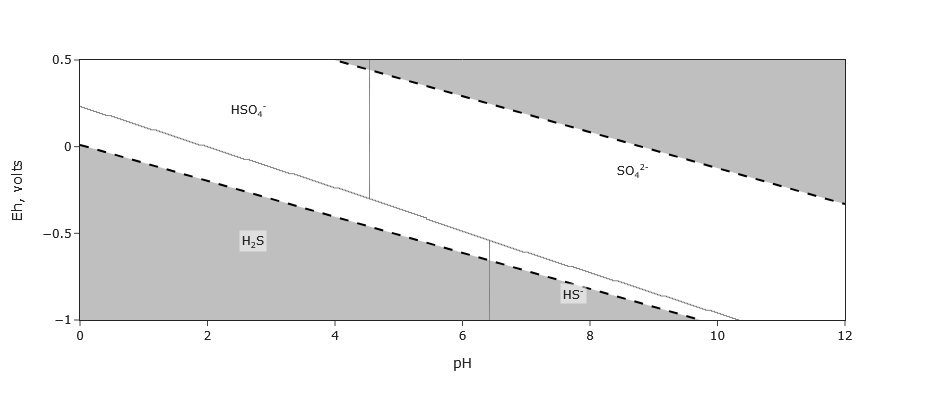

In [7]:
w = water_lines(d, lwd=2)

Two diagonal lines have been added to the plot representing the stability boundry of water.

To reiterate, liquid water is stable in the region between the dotted lines. Below the lower dotted line, H<sub>2(g)</sub> is stable. Above the upper dotted line, O<sub>2(g)</sub> is stable.

## Putting it all together

In [8]:
from pychnosz import *
_ = thermo("WORM")

basis(["H2O", "H2S", "e-", "H+"])
basis("H2S", -5)

species(retrieve("S", ["O", "H"], state="aq"))

a = affinity(pH=[0, 12], Eh=[-1, 0.5], T=250, P=2000)

d = diagram(a,
            balance="H2S", # balancing on sulfur in formation reactions
            fill="none", # no fill
            col="black", # black lines
            lwd=0.5, # line thickness
            width=500, height=400, interactive=True, plot_it=False)

w = water_lines(d, lwd=2)

The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species
affinity: temperature is 250 ºC
affinity: pressure is 2000 bar
affinity: variable 1 is log10(a_H+) at 256 values from 0 to -12
subcrt: 27 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
subcrt: 3 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
subcrt: 2 species at 250 ºC and 2000.00 bar [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]


## What about a static (non-interactive) version of the same plot?

The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species
affinity: temperature is 250 ºC
affinity: pressure is 2000 bar
affinity: variable 1 is log10(a_H+) at 256 values from 0 to -12
subcrt: 27 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
balance: on moles of H2S in formation reactions
diagram: using maximum affinity method for 2-D diagram
subcrt: 3 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
subcrt: 2 species at 250 ºC and 2000.00 bar [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
subcrt: 3 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
info_character: found H2O(liq) [water]; also available in gas
subcrt: 4 species at 250 ºC and 2000.00 bar (wet) [energy units: J]
subcrt: 2 species at 250 ºC and

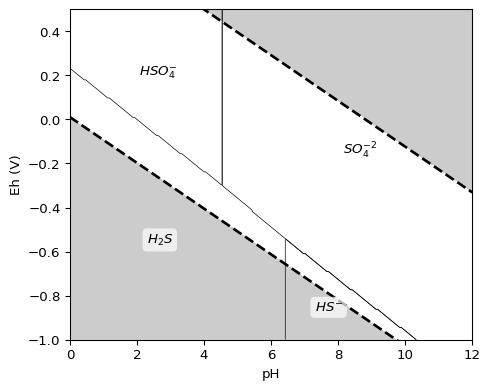

In [9]:
from pychnosz import *
_ = thermo("WORM")

basis(["H2O", "H2S", "e-", "H+"])
basis("H2S", -5)

species(retrieve("S", ["O", "H"], state="aq"))

a = affinity(pH=[0, 12], Eh=[-1, 0.5], T=250, P=2000)

d = diagram(a,
            balance="H2S", # balancing on sulfur in formation reactions
            fill=None, # no fill
            col="black", # black lines
            lwd=0.5, # line thickness
            width=500, height=400, interactive=False, plot_it=False)

w = water_lines(d, lwd=2)

End of demo.